# Project 2 By Sureh San

## Problem Statement
In the realm of fitness, there are numerous factors that come into play when athletes want to optimize their performance, whether it’d be for a specific sport or for health in general. However, there is often much confusion about which factors can attribute the most growth (which to focus on). Luckily, there are many datasets that focus heavily on exercise, diets, and specific measurements of individuals that can bring insights to what truly matters in a particular sport or way of living. The dataset I chose, which consists of more than 20,000 rows, contains in depth information of different individuals’ level of fitness, their nutrition breakdown, age, gender, height, weight, calories burnt, and much more. With this, we can dive into insights about correlation amongst these factors,  predicting future health risks, and even prescribing certain diets or exercises to certain demographics. 



In [164]:
# Importing all our libraries
import seaborn as sns
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Loading the data
df = pd.read_csv("athlete_data.csv")

df = pd.DataFrame(df)

# Sanity check
df.head(20)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260000e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020000e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.080000e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.990000e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.260000e+19,Low
5,53.19,Female,105.05,1.84,176.52,130.60,61.84,0.69,453.33,Yoga,...,1369.66,0.498985,0.646549,0.599581,0.739860,2313.67,71.382458,516.8928,1.510000e+20,Very High
6,23.17,Male,58.41,1.78,184.75,140.90,58.01,1.67,1953.90,Strength,...,2245.45,0.499374,1.923472,0.654016,0.762652,-86.90,46.408911,1098.6596,5.210000e+19,Low
7,55.92,Female,84.07,1.63,183.87,141.12,51.79,1.01,727.81,Yoga,...,2105.25,0.498886,1.253836,0.676333,0.767499,1463.19,57.093470,734.3912,1.180000e+20,Very High
8,24.11,Female,88.58,1.79,176.78,154.07,65.19,1.76,2062.37,Strength,...,1383.27,0.500495,0.783924,0.796487,0.871535,524.63,64.338094,1230.2752,8.550000e+19,High
9,39.19,Female,50.32,1.60,166.88,128.04,49.91,1.17,1157.25,Strength,...,1527.67,0.500265,1.525437,0.667949,0.767258,89.75,39.295200,763.5654,4.880000e+19,Low


## Data Dictionary

### Original Dataset Variables
| Variable | Description | Type | Units |
|----------|-------------|------|-------|
| `Age` | Age of the individual | Numeric | Years |
| `Gender` | Gender of the individual | Categorical | Male/Female |
| `Weight (kg)` | Body weight | Numeric | Kilograms |
| `Height (m)` | Body height | Numeric | Meters |
| `BMI` | Body Mass Index (weight/height²) | Numeric | kg/m² |
| `Fat_Percentage` | Body fat percentage | Numeric | % |
| `Workout_Type` | Type of workout performed | Categorical | Cardio, Strength, HIIT, Yoga |
| `Session_Duration (hours)` | Length of workout session | Numeric | Hours |
| `Calories_Burned` | Total calories burned in session | Numeric | Calories |
| `Max_BPM` | Maximum heart rate during workout | Numeric | Beats per minute |
| `Avg_BPM` | Average heart rate during workout | Numeric | Beats per minute |
| `Resting_BPM` | Resting heart rate | Numeric | Beats per minute |
| `Experience_Level` | Fitness experience (1-3 scale) | Numeric | 1=Beginner, 2=Intermediate, 3=Advanced |
| `Workout_Frequency (days/week)` | How often they work out | Numeric | Days per week |
| `Carbs` | Daily carbohydrate intake | Numeric | Grams |
| `Proteins` | Daily protein intake | Numeric | Grams |
| `Fats` | Daily fat intake | Numeric | Grams |
| `diet_type` | Type of diet followed | Categorical | Keto, Vegan, Balanced, etc. |

### Engineered Features (Created in Analysis)
| Variable | Description | Type | Formula/Source |
|----------|-------------|------|----------------|
| `Calories Burnt Per Hour` | Calorie burn rate | Numeric | Calories_Burned / Session_Duration |
| `Age_Group` | Binned age categories | Categorical | 18-25, 26-35, 36-45, 46-55, 55+ |
| `BMI_Category` | BMI health classification | Categorical | Underweight, Normal, Overweight, Obese |
| `Fitness_Level` | Experience level category | Categorical | Beginner, Intermediate, Advanced |
| `HR_Intensity` | Heart rate reserve utilization | Numeric | (Avg_BPM - Resting_BPM) / (Max_BPM - Resting_BPM) × 100 |
| `Carb_Pct` | Carbs as % of total macros | Numeric | (Carbs / Total_Macros) × 100 |
| `Protein_Pct` | Protein as % of total macros | Numeric | (Proteins / Total_Macros) × 100 |
| `Fat_Pct` | Fat as % of total macros | Numeric | (Fats / Total_Macros) × 100 |
| `Protein_Per_Kg` | Protein intake per kg body weight | Numeric | Proteins / Weight (kg) |
| `Calorie_Efficiency` | Calories burned per kg per hour | Numeric | Calories Burnt Per Hour / Weight (kg) |

# Data Cleaning
The first major step we are going to take in this data analysis project is cleaning up all of the data. Some of the variables in the columns tend to have scales that are not consistent with the other information or seem inaccurate or are just not relevant to our research.


In [165]:
# Removing nonsensical, irrelevant, and redundant columns

# Display original shape
print(f"Original dataset shape: {df.shape}")
print(f"Original columns: {list(df.columns)}\n")

columns_to_drop = [
    #already identified as problematic
    'Burns Calories (per 30 min)_bc',
    'meal_name',                        
    
    #redundant - duplicates of existing columns
    'BMI_calc',                        
    'cal_from_macros',                  
    'pct_carbs',                        
    'protein_per_kg',                  
    'pct_HRR',                         
    'pct_maxHR',                      
    
    #irrelevant - cooking/recipe data not related to fitness
    'meal_type',                        
    'rating',                           
    'cooking_method',                
    'prep_time_min',                    
    'cook_time_min',                    
    
    #irrelevant - exercise description data (appears to be from merged dataset)
                           
    'Burns Calories (per 30 min)',    
    'Target Muscle Group',              
    'Equipment Needed',               
    'Difficulty Level',                 
    'Body Part',                       
    'Burns_Calories_Bin',              

    #nonsensical values
    'Physical exercise',                
    
    #pre-calculated columns that add noise (we'll calculate our own)
    'cal_balance',                     
    'lean_mass_kg',                     
    'expected_burn',                    
]

# Drop columns that exist in the dataframe
columns_dropped = []
for col in columns_to_drop:
    if col in df.columns:
        df = df.drop(col, axis=1)
        columns_dropped.append(col)

print(f"Columns dropped ({len(columns_dropped)}):")
for col in columns_dropped:
    print(f"  - {col}")

print(f"\nNew dataset shape: {df.shape}")
print(f"\nRemaining columns ({len(df.columns)}):")
print(list(df.columns))

# Check for missing values in remaining columns
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("No missing values found!")

# Check for any remaining outliers or nonsensical values
print("\n--- Data Quality Check ---")
print(f"Age range: {df['Age'].min():.0f} - {df['Age'].max():.0f}")
print(f"Weight range: {df['Weight (kg)'].min():.1f} - {df['Weight (kg)'].max():.1f} kg")
print(f"Height range: {df['Height (m)'].min():.2f} - {df['Height (m)'].max():.2f} m")
print(f"BMI range: {df['BMI'].min():.1f} - {df['BMI'].max():.1f}")
print(f"Calories Burned range: {df['Calories_Burned'].min():.0f} - {df['Calories_Burned'].max():.0f}")

# Calculate and add Calories Burnt Per Hour if not present
if 'Calories Burnt Per Hour' not in df.columns:
    df['Calories Burnt Per Hour'] = df['Calories_Burned'] / df['Session_Duration (hours)']
    print("\nAdded 'Calories Burnt Per Hour' column")

print("\nData cleaning complete!")

Original dataset shape: (20000, 54)
Original columns: ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method', 'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets', 'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin']

Columns dropped (23):
  - Burns Calories (per 30 min)_bc
  - meal_name
  -

## Feature Engineering
Creating new variables that will help us analyze the data more effectively. These include things like Age Group, BMI Category, Fitness level, etc.

In [166]:
# Age groups put into bins so we can more easily analyze demographic differences
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], 
                          labels=['18-25', '26-35', '36-45', '46-55', '55+'])

# BMI categories that are cut up into ranges of health
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 100],
                             labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Fitness Level based on experience
df['Fitness_Level'] = pd.cut(df['Experience_Level'], bins=[0, 1.5, 2.5, 5],
                              labels=['Beginner', 'Intermediate', 'Advanced'])

# Heart Rate Reserve Utilization (how hard they're working)
df['HR_Intensity'] = (df['Avg_BPM'] - df['Resting_BPM']) / (df['Max_BPM'] - df['Resting_BPM']) * 100

# Macro Ratios (percentages)
df['Total_Macros'] = df['Carbs'] + df['Proteins'] + df['Fats']
df['Carb_Pct'] = (df['Carbs'] / df['Total_Macros']) * 100
df['Protein_Pct'] = (df['Proteins'] / df['Total_Macros']) * 100
df['Fat_Pct'] = (df['Fats'] / df['Total_Macros']) * 100

# Protein per kg of body weight (important for muscle building)
df['Protein_Per_Kg'] = df['Proteins'] / df['Weight (kg)']

# Calorie Efficiency (calories burned per kg body weight per hour)
df['Calorie_Efficiency'] = df['Calories Burnt Per Hour'] / df['Weight (kg)']

# Display new features
print("New Features Created:")
print(df[['Age_Group', 'BMI_Category', 'Fitness_Level', 'HR_Intensity', 
          'Carb_Pct', 'Protein_Pct', 'Fat_Pct', 'Calorie_Efficiency']].head(10))

New Features Created:
  Age_Group BMI_Category Fitness_Level  HR_Intensity   Carb_Pct  Protein_Pct  \
0     26-35       Normal  Intermediate     74.123651  60.104185    23.812197   
1     18-25       Normal  Intermediate     55.124706  60.084104    23.944491   
2     26-35       Normal      Beginner     57.453364  60.063960    23.950883   
3     36-45        Obese  Intermediate     74.415474  60.014175    23.873368   
4     46-55  Underweight  Intermediate     66.840476  60.041135    24.004547   
5     46-55        Obese      Beginner     59.958144  59.984553    23.844966   
6     18-25  Underweight      Advanced     65.401610  59.944403    24.024377   
7       55+        Obese  Intermediate     67.633253  59.899624    24.046994   
8     18-25   Overweight      Advanced     79.648714  60.007628    24.075166   
9     36-45       Normal      Beginner     66.794905  59.981791    24.098201   

     Fat_Pct  Calorie_Efficiency  
0  16.083618           16.560441  
1  15.971405           23.4

## Analysis 1: Which Workout Type Burns the Most Calories?
Comparing different workout types to see which is most effective for calorie burning.

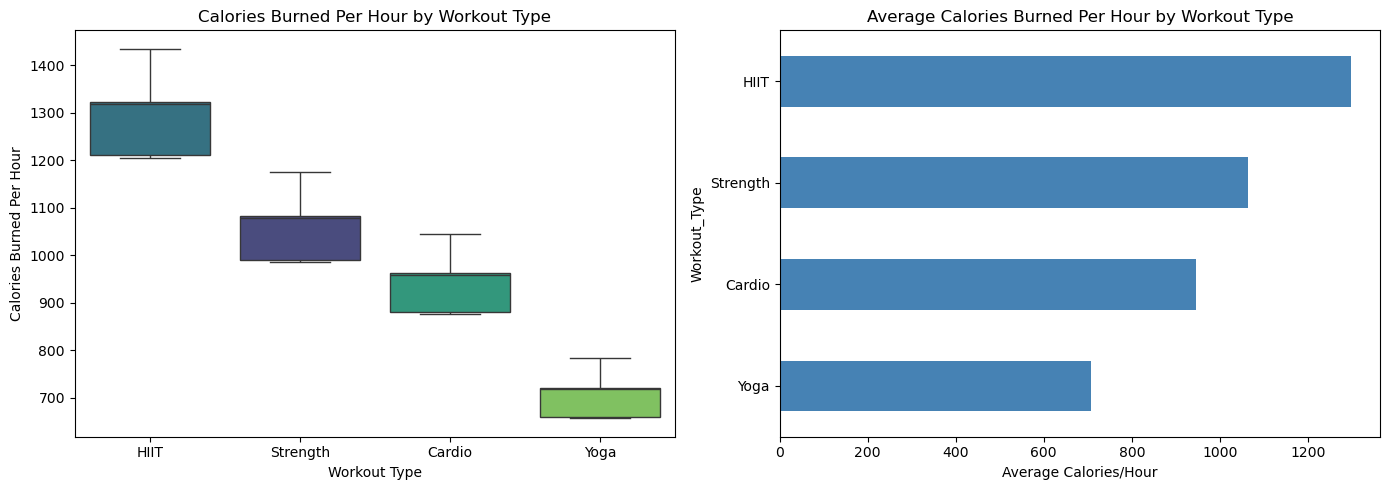


Workout Type Statistics:
              Calories Burnt Per Hour  Calories_Burned  \
Workout_Type                                             
HIIT                          1298.77          1652.53   
Strength                      1063.48          1361.43   
Cardio                         945.18          1211.54   
Yoga                           707.38           897.11   

              Session_Duration (hours)  
Workout_Type                            
HIIT                              1.26  
Strength                          1.26  
Cardio                            1.27  
Yoga                              1.25  


In [167]:
# Calories burned by workout type
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot of calories burned per hour by workout type
workout_order = df.groupby('Workout_Type')['Calories Burnt Per Hour'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='Workout_Type', y='Calories Burnt Per Hour', order=workout_order, ax=axes[0], 
            hue='Workout_Type', palette='viridis', legend=False)
axes[0].set_title('Calories Burned Per Hour by Workout Type', fontsize=12)
axes[0].set_xlabel('Workout Type')
axes[0].set_ylabel('Calories Burned Per Hour')

# Bar plot of average calories by workout type
workout_stats = df.groupby('Workout_Type').agg({
    'Calories Burnt Per Hour': 'mean',
    'Calories_Burned': 'mean',
    'Session_Duration (hours)': 'mean'
}).round(2)
workout_stats['Calories Burnt Per Hour'].sort_values(ascending=True).plot(kind='barh', ax=axes[1], color='steelblue')
axes[1].set_title('Average Calories Burned Per Hour by Workout Type', fontsize=12)
axes[1].set_xlabel('Average Calories/Hour')

plt.tight_layout()
plt.show()

# Summary statistics
print("\nWorkout Type Statistics:")
print(workout_stats.sort_values('Calories Burnt Per Hour', ascending=False))

From this analysis, we can clearly see that the best calorie burner per hour is HIIT (High Intensity Training), with strength and cardio behind. This could be that the cardio is more so lighter, thus leading to less caloric burning. Going back to our problem statement, we can see that these sort of workout types are most optimal if one plans on burning calories and losing weight as their goal.

## Analysis 2: BMI, Body Composition, and Fitness
Understanding how body metrics relate to workout performance and efficiency.

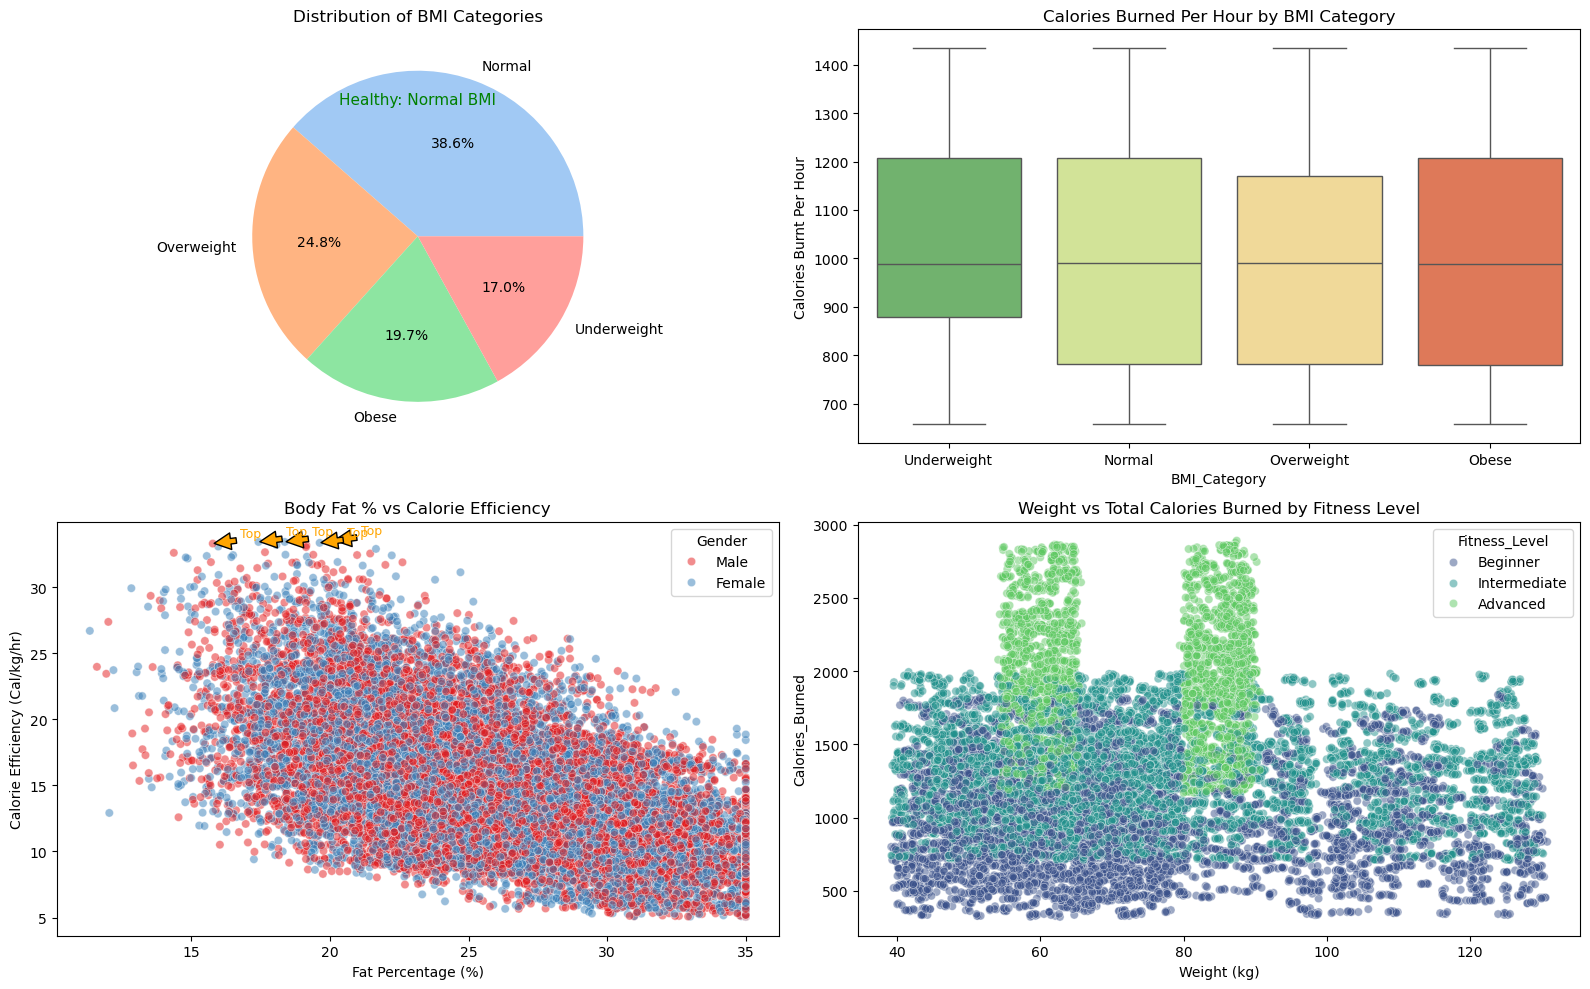


Performance by BMI Category:
              Calories Burnt Per Hour  Calorie_Efficiency  Fat_Percentage
BMI_Category                                                             
Underweight                    988.32               19.90           19.58
Normal                        1013.56               15.70           24.05
Overweight                    1005.44               13.16           28.26
Obese                          993.34                9.90           33.03

 Insight: Top calorie efficiency performers are annotated!


In [168]:
# BMI and Body Composition Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. BMI Category distribution
bmi_counts = df['BMI_Category'].value_counts()
axes[0, 0].pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[0, 0].set_title('Distribution of BMI Categories', fontsize=12)

# Annotate healthiest BMI range
axes[0, 0].text(0, 0.8, 'Healthy: Normal BMI', fontsize=11, color='green', ha='center')

# 2. Calories Burned by BMI Category
sns.boxplot(data=df, x='BMI_Category', y='Calories Burnt Per Hour', ax=axes[0, 1], 
            order=['Underweight', 'Normal', 'Overweight', 'Obese'], hue='BMI_Category',
            palette='RdYlGn_r', legend=False)
axes[0, 1].set_title('Calories Burned Per Hour by BMI Category', fontsize=12)

# 3. Fat Percentage vs Calorie Efficiency
sns.scatterplot(data=df, x='Fat_Percentage', y='Calorie_Efficiency', 
                hue='Gender', alpha=0.5, ax=axes[1, 0], palette='Set1')
axes[1, 0].set_title('Body Fat % vs Calorie Efficiency', fontsize=12)
axes[1, 0].set_xlabel('Fat Percentage (%)')
axes[1, 0].set_ylabel('Calorie Efficiency (Cal/kg/hr)')

# Annotate top performers
top_eff = df.nlargest(5, 'Calorie_Efficiency')
for i, row in top_eff.iterrows():
    axes[1, 0].annotate('Top', xy=(row['Fat_Percentage'], row['Calorie_Efficiency']),
                       xytext=(row['Fat_Percentage']+1, row['Calorie_Efficiency']+0.5),
                       arrowprops=dict(facecolor='orange', shrink=0.05), fontsize=9, color='orange')

# 4. Weight vs Calories Burned by Experience Level
sns.scatterplot(data=df, x='Weight (kg)', y='Calories_Burned', 
                hue='Fitness_Level', alpha=0.5, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Weight vs Total Calories Burned by Fitness Level', fontsize=12)

plt.tight_layout()
plt.show()

# Summary statistics
print("\nPerformance by BMI Category:")
print(df.groupby('BMI_Category', observed=True).agg({
    'Calories Burnt Per Hour': 'mean',
    'Calorie_Efficiency': 'mean',
    'Fat_Percentage': 'mean'
}).round(2))
print("\n Insight: Top calorie efficiency performers are annotated!")

We notice that there tends to be a slight negative relationship between fat percetnage and calorie efficiency, possibly supporting the fact that those at lower fat percentages can burn fat off more easily. This could also come with the factor of discipline. Also, we see an interesting point where advanced athletes are within smaller ranges, so this could mean that there's a limited source of advanced athletes at multiple weight classes. This could also mean that there's an optimal range for certain performances.

## Analysis 3: Comprehensive Correlation Analysis
Understanding which factors have the strongest relationships with performance.

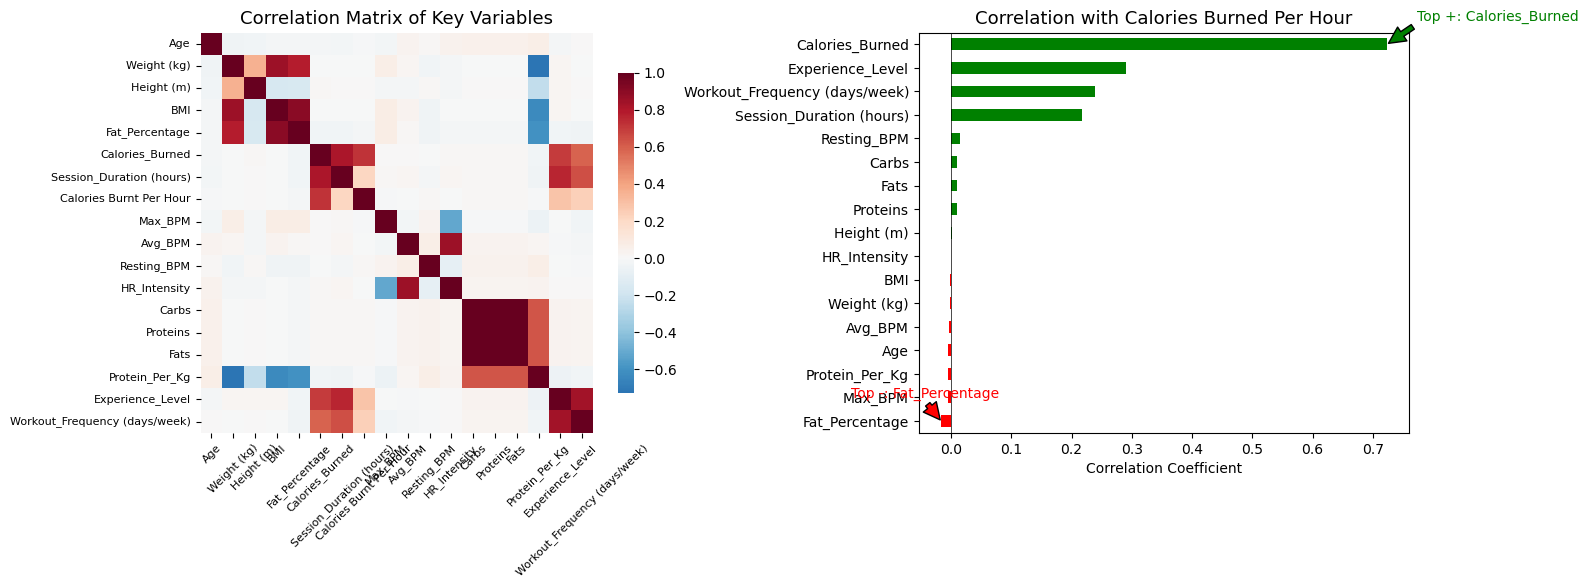


 KEY CORRELATION INSIGHTS:

Strongest POSITIVE correlations with Calories Burned:
Calories_Burned                  0.723256
Experience_Level                 0.289675
Workout_Frequency (days/week)    0.238937
Session_Duration (hours)         0.217435
Resting_BPM                      0.014410
Name: Calories Burnt Per Hour, dtype: float64

Strongest NEGATIVE correlations with Calories Burned:
Fat_Percentage   -0.016735
Max_BPM          -0.005948
Protein_Per_Kg   -0.005925
Age              -0.005520
Avg_BPM          -0.004150
Name: Calories Burnt Per Hour, dtype: float64

 INSIGHT: Top positive and negative factors for calorie burn are annotated!


In [169]:
# Comprehensive Correlation Heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Select key numeric columns for correlation
key_cols = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Fat_Percentage',
            'Calories_Burned', 'Session_Duration (hours)', 'Calories Burnt Per Hour',
            'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'HR_Intensity',
            'Carbs', 'Proteins', 'Fats', 'Protein_Per_Kg',
            'Experience_Level', 'Workout_Frequency (days/week)']

corr = df[key_cols].corr()

# Full correlation heatmap
sns.heatmap(corr, cmap='RdBu_r', center=0, ax=axes[0], 
            xticklabels=True, yticklabels=True, fmt='.1f',
            cbar_kws={'shrink': 0.8})
axes[0].set_title('Correlation Matrix of Key Variables', fontsize=13)
axes[0].tick_params(axis='x', rotation=45, labelsize=8)
axes[0].tick_params(axis='y', labelsize=8)

# Top correlations with Calories Burnt Per Hour
cal_corr = corr['Calories Burnt Per Hour'].drop('Calories Burnt Per Hour').sort_values()
colors = ['green' if x > 0 else 'red' for x in cal_corr]
cal_corr.plot(kind='barh', ax=axes[1], color=colors)
axes[1].set_title('Correlation with Calories Burned Per Hour', fontsize=13)
axes[1].set_xlabel('Correlation Coefficient')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Annotate top positive/negative factors using numeric positions
pos = cal_corr.nlargest(1)
neg = cal_corr.nsmallest(1)
pos_idx = list(cal_corr.index).index(pos.index[0])
neg_idx = list(cal_corr.index).index(neg.index[0])
axes[1].annotate(f'Top +: {pos.index[0]}', xy=(pos.values[0], pos_idx), xytext=(pos.values[0] + 0.05, pos_idx + 1),
                 arrowprops=dict(facecolor='green', shrink=0.05), fontsize=10, color='green')
axes[1].annotate(f'Top -: {neg.index[0]}', xy=(neg.values[0], neg_idx), xytext=(neg.values[0] - 0.15, neg_idx + 1),
                 arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Key insights
print("\n KEY CORRELATION INSIGHTS:")
print("\nStrongest POSITIVE correlations with Calories Burned:")
print(cal_corr.nlargest(5))
print("\nStrongest NEGATIVE correlations with Calories Burned:")
print(cal_corr.nsmallest(5))
print("\n INSIGHT: Top positive and negative factors for calorie burn are annotated!")

The results from these visualizations show that session duration and protein intake per kilogram are highly connected, meaning more protein intake will lead to support longer sessions in the gym. Also, it shows that more protein is negatively correlated with BMI, meaning leaner individuals get supported by higher protein intake.

## Analysis 4: Summary Statistics Dashboard
A quick overview of the dataset's key metrics, such as demographic breakdown and workout stats.

In [170]:
#Summary Statistics Dashboard
print("=" * 60)
print("DATASET SUMMARY DASHBOARD")
print("=" * 60)

print(f"Dataset Size: {len(df):,} records")
print(f"Number of Features: {len(df.columns)} columns")

print("-" * 40)
print("DEMOGRAPHIC BREAKDOWN")
print("-" * 40)
print(f"Gender Distribution:\n{df['Gender'].value_counts()}")
print(f"Age Range: {df['Age'].min():.0f} - {df['Age'].max():.0f} years")
print(f"Average Age: {df['Age'].mean():.1f} years")

print("-" * 40)
print("WORKOUT STATISTICS")
print("-" * 40)
print(f"Workout Types: {df['Workout_Type'].nunique()}")
print(f"{df['Workout_Type'].value_counts()}")
print(f"Avg Session Duration: {df['Session_Duration (hours)'].mean():.2f} hours")
print(f"Avg Calories Burned: {df['Calories_Burned'].mean():.0f} cal/session")
print(f"Avg Calories/Hour: {df['Calories Burnt Per Hour'].mean():.0f} cal/hr")

print("-" * 40)
print("NUTRITION STATISTICS")
print("-" * 40)
print(f"Diet Types: {df['diet_type'].nunique()}")
print(f"{df['diet_type'].value_counts()}")
print(f"Avg Macro Split: Carbs {df['Carb_Pct'].mean():.1f}% | Protein {df['Protein_Pct'].mean():.1f}% | Fat {df['Fat_Pct'].mean():.1f}%")

print("-" * 40)
print("FITNESS LEVELS")
print("-" * 40)
print(f"{df['Fitness_Level'].value_counts()}")

print("=" * 60)

DATASET SUMMARY DASHBOARD
Dataset Size: 20,000 records
Number of Features: 42 columns
----------------------------------------
DEMOGRAPHIC BREAKDOWN
----------------------------------------
Gender Distribution:
Gender
Female    10028
Male       9972
Name: count, dtype: int64
Age Range: 18 - 60 years
Average Age: 38.9 years
----------------------------------------
WORKOUT STATISTICS
----------------------------------------
Workout Types: 4
Workout_Type
Strength    5071
Yoga        5032
HIIT        4974
Cardio      4923
Name: count, dtype: int64
Avg Session Duration: 1.26 hours
Avg Calories Burned: 1280 cal/session
Avg Calories/Hour: 1003 cal/hr
----------------------------------------
NUTRITION STATISTICS
----------------------------------------
Diet Types: 6
diet_type
Paleo         3403
Low-Carb      3379
Vegetarian    3337
Keto          3324
Vegan         3323
Balanced      3234
Name: count, dtype: int64
Avg Macro Split: Carbs 60.0% | Protein 24.0% | Fat 16.0%
------------------------

# Conclusion
This Exploratory Data Analysis provides expansive info on how diet plays a role in your workout aswell as what sort of nutritional considerations to take. Additionally, it helps predict what sort of fitness routine is most optimal depending on what your goals are.

# Major Insights:
- Protein is of high importance not only in building muscle but also in overall athlete performance as visualizations show connections with protein helping longer workout sessions in addition with carbs.
- HIIT is the best calorie burner when it comes to calories per minute burnt.
- Focusing on less fats and more carbs as your fuel source is important for lean muscle gain.
- Depending on your goals, there may be more of an optimal weight class for better athletic performance.
- More BPM intensity, more calories burnt.
- Much of good results come from experience but also consistency, which is one of the most important factors of success in fitness.

## Statistical Considerations
- The dataset represents a sample population, not the entire population
- Real dieticianal research is needed to support this
- Some visualizations are more important than other ones
- Results may be affected by sampling bias or missing demographic groups
- Outliers and extreme values
- Correlation does not imply causation
- Data quality
- Multicollinearity between variables (e.g., macros and calories) may affect regression results
- Results may not generalize
- Further validation with external datasets/more randomized trials is needed 
